In [1]:
# Figure 1 

setwd('/Users/ibishara/Desktop/FELINE_C1/')

# packages
library(data.table)
library(tidyverse)
library(ggridges)
library(ggpubr)
library(qs)
library(factoextra)


# data
# meta_raw <- read.table('raw/FELINE_C1_raw_singler_metadata.txt', sep='\t') # combined raw metadata of FELINE-C1. Generated by IB. Not used in this analysis. 

# hpca_anno_raw <- as.data.frame(fread('/Users/ibishara/Desktop/FELINE_C1/raw/SingleR/hpca/FELINE_C1_hpca_singleR_annotations.txt', sep='auto'))[, -1] # hpca singleR annotations FELINE-C1
# metadata_post_filter <- as.data.frame(fread('/Users/ibishara/Desktop/FELINE_C1/post-filter/FEL001046_scRNA.metadata_JF.txt', sep='auto')) # Jinfeng's high quality metadata 
meta_sub_LQ <- fread('metadata_subsample_LQ.txt', sep='\t', data.table=F) # low quality subsample metadata
meta_sub_HQ <- fread('metadata_subsample_HQ.txt', sep='\t', data.table=F) # high quality subsample metadata

meta_sub <- bind_rows(meta_sub_HQ[, c('Cell', 'Percent.Mitochondria', 'nCount_RNA', 'nFeature_RNA', 'Annotation', 'Celltype', 'hpca', 'Lineage')], 
meta_sub_LQ[, c('Cell', 'nCount_RNA', 'nFeature_RNA', 'Percent.Mitochondria', 'hpca', 'Lineage') ])
# Edit to block back identification to patients 

head(meta_sub_LQ)
head(meta_sub_HQ)
head(meta_sub)
is.na(meta_sub[["Celltype"]])


-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x purrr::transpose() masks data.table::transpose()

qs v0.23.6.

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



,Cell,Sample,Total Reads,Total Reads (Thousands),Total Non-Mitochondria Reads,Total Non-Mitochondria Reads (Thousands),Expressed Features,S,G2M,Phase,Percent.Mitochondria,blueprint,hpca,nCount_RNA,nFeature_RNA,Lineage
,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,FEL011_E_AACCATGAGCGCCTTG,FEL011_E,3,0.003,3,0.003,3,0.000000000,0,Undecided,0.0,Skeletal_muscle,iPS_cells,3,3,
2,FEL011_E_AACCATGCACGGCGTT,FEL011_E,21,0.021,21,0.021,4,0.000000000,0,Undecided,0.0,Neutrophils,Osteoblasts,21,4,Mesenchymal_cells
3,FEL011_E_ACACCAAAGTTACGGG,FEL011_E,12,0.012,11,0.011,5,-0.004144567,0,G2M,8.3,Neutrophils,Neutrophils,12,5,Hematopoeitic_cells
4,FEL011_E_ACACCAAGTCCTCCAT,FEL011_E,11,0.011,11,0.011,6,0.000000000,0,Undecided,0.0,Neutrophils,Hepatocytes,11,6,
5,FEL011_E_ACACTGAAGAGCTGCA,FEL011_E,9,0.009,9,0.009,2,0.000000000,0,Undecided,0.0,Neutrophils,Neutrophils,9,2,Hematopoeitic_cells
6,FEL011_E_ACACTGAGTAGCGCTC,FEL011_E,8,0.008,8,0.008,2,0.000000000,0,Undecided,0.0,Neutrophils,Neutrophils,8,2,Hematopoeitic_cells


,Cell,Patient,nCount_RNA,nFeature_RNA,Percent.Mitochondria,Batch,Annotation,Celltype,hpca,Lineage
,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,FEL011_M_AAAGTCCCAGCGAGTA,FEL011,5931,2732,0.2,COH039,Fibroblast,Fibroblasts,Chondrocytes,Mesenchymal_cells
2,FEL011_M_AAAGTGAAGAGGACTC,FEL011,3545,1796,2.3,COH039,Cancer,Cancer cells,Epithelial_cells,Epithelial_cells
3,FEL011_M_AACAACCGTCCTCCTA,FEL011,11860,3418,3.7,COH039,Cancer,Cancer cells,Epithelial_cells,Epithelial_cells
4,FEL011_M_AACAGGGCATCGCTCT,FEL011,5114,2276,0.9,COH039,Cancer,Cancer cells,Epithelial_cells,Epithelial_cells
5,FEL011_M_AACCATGAGTATGAGT,FEL011,7814,3059,2.1,COH039,Cancer,Cancer cells,Epithelial_cells,Epithelial_cells
6,FEL011_M_AACGAAAAGTCACTAC,FEL011,12605,3824,2.5,COH039,Cancer,Cancer cells,Epithelial_cells,Epithelial_cells


,Cell,Percent.Mitochondria,nCount_RNA,nFeature_RNA,Annotation,Celltype,hpca,Lineage
,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,FEL011_M_AAAGTCCCAGCGAGTA,0.2,5931,2732,Fibroblast,Fibroblasts,Chondrocytes,Mesenchymal_cells
2,FEL011_M_AAAGTGAAGAGGACTC,2.3,3545,1796,Cancer,Cancer cells,Epithelial_cells,Epithelial_cells
3,FEL011_M_AACAACCGTCCTCCTA,3.7,11860,3418,Cancer,Cancer cells,Epithelial_cells,Epithelial_cells
4,FEL011_M_AACAGGGCATCGCTCT,0.9,5114,2276,Cancer,Cancer cells,Epithelial_cells,Epithelial_cells
5,FEL011_M_AACCATGAGTATGAGT,2.1,7814,3059,Cancer,Cancer cells,Epithelial_cells,Epithelial_cells
6,FEL011_M_AACGAAAAGTCACTAC,2.5,12605,3824,Cancer,Cancer cells,Epithelial_cells,Epithelial_cells


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

In [2]:

options(repr.plot.width=14, repr.plot.height=6)

# pre.retained.epi <- length(which(meta_sub$nCount_RNA[epi.ind] > nCount_RNA_cutoff))
# post.retained.epi <- length(which(meta_sub$nCount_RNA[epi.ind] < nCount_RNA_cutoff & meta_sub$nCount_RNA[epi.ind] > new.nCount_RNA_cutoff))

# pre.retained.tcell <- length(which(meta_sub$nCount_RNA[tcell.ind] > nCount_RNA_cutoff))
# post.retained.tcell <- length(which(meta_sub$nCount_RNA[tcell.ind] < nCount_RNA_cutoff & meta_sub$nCount_RNA[tcell.ind] > new.nCount_RNA_cutoff))

# pre.retained.macro <- length(which(meta_sub$nCount_RNA[macro.ind] > nCount_RNA_cutoff))
# post.retained.macro <- length(which(meta_sub$nCount_RNA[macro.ind] < nCount_RNA_cutoff & meta_sub$nCount_RNA[macro.ind] > new.nCount_RNA_cutoff))

# pre.retained.fibro <- length(which(meta_sub$nCount_RNA[fibro.ind] > nCount_RNA_cutoff))
# post.retained.fibro <- length(which(meta_sub$nCount_RNA[fibro.ind] < nCount_RNA_cutoff & meta_sub$nCount_RNA[fibro.ind] > new.nCount_RNA_cutoff))
## Plot number of reads and genes by Cell type. Epithelial cells are used as a reference 

par(mfrow=c(2,4), mar=c(6,5,5,1))
plot(main = "All cells: total reads (log10)", sub = paste('pct cells retained:', round(100*all.retained),'%' ), density(log10(meta_sub$nCount_RNA)), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")
plot(main = "Epithelial cells: total reads (log10)", sub = paste('pct cells retained:', round(100*epi.retained),'%' ), density(log10(meta_sub$nCount_RNA[epi.ind])), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")
plot(main = "Mesenchymal cells: total reads (log10)", sub = paste('pct cells retained:', round(100*mes.retained),'%' ), density(log10(meta_sub$nCount_RNA[mes.ind])), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")
plot(main = "Hematopoeitic cells: total reads (log10)", sub = paste('pct cells retained:', round(100*hem.retained),'%' ), density(log10(meta_sub$nCount_RNA[hem.ind])), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")

plot(main = "Fibroblasts: total reads (log10)", sub = paste('pct cells retained:', round(100*fibro.retained ),'%' ), density(log10(meta_sub$nCount_RNA[fibro.ind])), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")
# plot(main = "Endothelial cells: total reads (log10)", sub = paste('pct cells retained:', round(100*endo.retained ),'%' ), density(log10(meta_sub$nCount_RNA[endo.ind])), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")
plot(main = "B.cells: total reads (log10)", sub = paste('pct cells retained:', round(100*bcell.retained ),'%' ), density(log10(meta_sub$nCount_RNA[bcell.ind])), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")
plot(main = "T.cells: total reads (log10)", sub = paste('pct cells retained:', round(100*tcell.retained ),'%' ), density(log10(meta_sub$nCount_RNA[tcell.ind])), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")
plot(main = "Macrophages: total reads (log10)", sub = paste('pct cells retained:', round(100*macro.retained ),'%' ), density(log10(meta_sub$nCount_RNA[macro.ind])), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")





# options(repr.plot.width=6, repr.plot.height=6)


# Unneeded? 
# ggplot(retained_sorted, aes(as.factor(type), round(as.numeric(pct_retained_reads_filter), 2), fill = as.factor(type) )) + 
# geom_bar(stat = "identity") + 
# xlab ('Lineage') + 
# ylab ('% retained after UMI filter')

# plot(main = "Epithelial cells: expressed genes (log10)",density(log10(meta_sub$Expressed.Features[epi.ind])), cex.main = 1); abline(v=log10(Expressed.Features_cutoff.min), lty=2, col="darkred"); abline(v=log10(Expressed.Features_cutoff.max), lty=2, col="darkred")
# plot(main = "T.cells: expressed genes (log10)",density(log10(meta_sub$Expressed.Features[tcell.ind])), cex.main = 1); abline(v=log10(Expressed.Features_cutoff.min), lty=2, col="darkred"); abline(v=log10(Expressed.Features_cutoff.max), lty=2, col="darkred")
# plot(main = "Macrophages: expressed genes (log10)", density(log10(meta_sub$Expressed.Features[macro.ind])), cex.main = 1); abline(v=log10(Expressed.Features_cutoff.min), lty=2, col="darkred"); abline(v=log10(Expressed.Features_cutoff.max), lty=2, col="darkred")
# plot(main = "Fibroblasts: expressed genes (log10)", density(log10(meta_sub$Expressed.Features[fibro.ind])), cex.main = 1); abline(v=log10(Expressed.Features_cutoff.min), lty=2, col="darkred"); abline(v=log10(Expressed.Features_cutoff.max), lty=2, col="darkred")



ERROR: Error in paste("pct cells retained:", round(100 * all.retained), "%"): object 'all.retained' not found


ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): object 'nCount_RNA_cutoff' not found


In [37]:
unique(meta_sub[["HQ_LQ_annotation"]])
unique(meta_sub[ mes.ind,]$HQ_LQ_annotation )
unique(meta_sub[ epi.ind,]$HQ_LQ_annotation )

[1] "Fibroblasts"             "Cancer cells"           
 [3] "Endothelial cells"       "Adipocytes"             
 [5] "Normal epithelial cells" "Pericytes"              
 [7] "T cells"                 "Macrophages"            
 [9] "B cells"                 "iPS_cells"              
[11] "Osteoblasts"             "Neutrophils"            
[13] "Hepatocytes"             "Embryonic_stem_cells"   
[15] "DC"                      "NK_cell"                
[17] "Platelets"               "Tissue_stem_cells"      
[19] "Gametocytes"             "Epithelial_cells"       
[21] "Smooth_muscle_cells"     "Astrocyte"              
[23] "HSC_-G-CSF"              "Erythroblast"           
[25] "Chondrocytes"            "Neurons"                
[27] "Keratinocytes"           "Neuroepithelial_cell"   
[29] "Monocyte"                "MSC"                    
[31] "HSC_CD34+"               "CMP"                    
[33] "Pre-B_cell_CD34-"        "BM"                     
[35] "Pro-B_cell_CD34+"        "MEP"                    
[37] "Myelocyte"               "Pro-Myelocyte"          
[39] "BM_&_Prog."

[1] "Fibroblasts"         "Endothelial cells"   "Adipocytes"         
[4] "Pericytes"           "Osteoblasts"         "Smooth_muscle_cells"
[7] "Chondrocytes"

[1] "Cancer cells"            "Normal epithelial cells"
[3] "Epithelial_cells"

In [41]:
# Skip / delete
# options(repr.plot.width=10, repr.plot.height=8)

# plot1 <- ggplot(meta_sub[mes.ind,], aes(x = nCount_RNA, y = HQ_LQ_annotation, fill = HQ_LQ_annotation)) +
#             geom_density_ridges() +
#             theme_ridges() + 
#             ggtitle("Mesenchymal cells")+
#             geom_vline(xintercept = nCount_RNA_cutoff, linetype = "longdash") +
#             xlim(0, 10000) +
#             theme(legend.position = "none", axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5))



# plot2 <- ggplot(meta_sub, aes(x = nCount_RNA, y = Lineage, fill = Lineage)) +
#             geom_density_ridges() +
#             theme_ridges() + 
#             ggtitle("Hematopoetic cells")+
#             geom_vline(xintercept = nCount_RNA_cutoff, linetype = "longdash") +
#             xlim(0, 10000) +
#             theme(legend.position = "none", axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5))

# # plot3 <- ggplot(meta_sub[mes.ind,], aes(x = nFeature_RNA, y = hpca, fill = hpca)) +
# #             geom_density_ridges() +
# #             theme_ridges() + 
# #             ggtitle("Mesenchymal cells")+
# #             geom_vline(xintercept = 500, linetype = "longdash") +
# #             xlim(0, 8000) +
# #             theme(legend.position = "none", axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5))

# # plot4 <- ggplot(meta_sub[hem.ind,], aes(x = nFeature_RNA, y = hpca, fill = hpca)) +
# #             geom_density_ridges() +
# #             theme_ridges() + 
# #             ggtitle("Hematopoetic cells")+
# #             geom_vline(xintercept = 500, linetype = "longdash") +
# #             xlim(0, 8000) +
# #             theme(legend.position = "none", axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5))


# ggarrange(grobs = plot1, plot2, ncol=1, nrow=2, heights=c(200,200), widths = c(100,100)) #common.legend = TRUE, legend="bottom")


In [65]:
###################################################################################################################


[1] "non-binary/Celltype/Performance_summary_non-binary_Celltype.txt"
[2] "non-binary/Lineage/Performance_summary_non-binary_Lineage.txt"  
[3] "floor/Celltype/Performance_summary_floor_Celltype.txt"          
[4] "floor/Lineage/Performance_summary_floor_Lineage.txt"

Warning message in fread(x, sep = "auto"):
"Detected 10 column names but the data has 11 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file."
Warning message in fread(x, sep = "auto"):
"Detected 10 column names but the data has 11 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file."
Warning message in fread(x, sep = "auto"):
"Detected 10 column names but the data has 11 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write

V1,class,source,threshold,method,AUC_SCN,AUC_pROC,VnCells,nTopGenes,Avg.Reads,Avg.Genes
<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,Celltype,genes,0.2,non-binary,0.5072325,0.6601342,400,25,418,200
2,Celltype,genes,0.4,non-binary,0.7171094,0.8037368,400,25,836,400
3,Celltype,genes,0.6,non-binary,0.8344426,0.8784217,400,25,1257,600
4,Celltype,genes,0.8,non-binary,0.8751845,0.9348080,400,25,1676,800
5,Celltype,genes,1.0,non-binary,0.9316127,0.9535841,400,25,2093,1000
6,Celltype,genes,1.5,non-binary,0.9717157,0.9773941,400,25,3098,1476
7,Celltype,genes,2.0,non-binary,0.9871489,0.9882216,400,25,3876,1819
8,Celltype,genes,2.5,non-binary,0.9923843,0.9897329,400,25,4434,2046
9,Celltype,genes,3.0,non-binary,0.9943599,0.9931400,400,25,4825,2191


In [164]:
# Figure 2

# packages
library(data.table)
library(ggridges)
library(ggpubr)
library(stringr)

# data
# all.perf1 <- paste('non-binary/', list.files(path = "/Users/ibishara/Desktop/FELINE_C1/SCN_Performance_summary_non-binary_Lineage.txt", pattern = "SCNPerformance_*", recursive = TRUE), sep='') # create a list of raw count tables from all batches
# all.perf2 <- paste('floor/', list.files(path = "/Users/ibishara/Desktop/FELINE_C1/SCN/floor/", pattern = "Performance_*", recursive = TRUE), sep='') # create a list of raw count tables from all batches
# all.perf <- c(all.perf1, all.perf2)
# all.perf

all.perf <- list.files(path = "/Users/ibishara/Desktop/FELINE_C1/", pattern = "SCN_Performance*", recursive = FALSE)  # create a list of raw count tables from all batches
perf.list.SCN <- lapply( all.perf, FUN = function(x) {fread(x, sep='auto')})
perf.SCN <- as.data.frame(do.call(rbind, perf.list.SCN))  #join list of tables 


all.perf <- list.files(path = "/Users/ibishara/Desktop/FELINE_C1/", pattern = "SR_Performance*", recursive = FALSE)  # create a list of raw count tables from all batches
perf.list.SR <- lapply( all.perf, FUN = function(x) {fread(x, sep='auto')})
perf.SR <- as.data.frame(do.call(rbind, perf.list.SR))  #join list of tables 

### deployment script
# SCN_Performance_summary_non_binary_Lineage <- fread("/Users/ibishara/Desktop/FELINE_C1/SCN_Performance_summary_non-binary_Lineage.txt", sep='auto')
# SCN_Performance_summary_floor_Lineage <- fread("/Users/ibishara/Desktop/FELINE_C1/SCN_Performance_summary_floor_Lineage.txt", sep='auto')

###

# distribution clean-up
# table_type = reads, genes
# method = floor, non-binary

dist.clean <- function(table_type, method){
        ## Deployment :             dist <- fread(paste('SCN_', table_type, '_distribution_', method, '.txt' , sep=''), sep = '\t') # read distribution table 
            if(method == 'floor') {dist <- fread(paste('SCN_', table_type, '_distribution_reads_', method, '_Lineage.txt' , sep=''), sep = '\t') # read distribution table 
            } else {dist <- fread(paste('SCN_', table_type, '_distribution_genes_', method, '_Lineage.txt' , sep=''), sep = '\t') }# read distribution table 

            ##
            # data clean-up
            dist$V1 <- NULL
            dist <- as.data.frame(t(dist))
            colnames(dist) <- dist[1,]
            dist <- dist[-1,]
            dist <- melt(dist)
        }
dist.reads_floor <- dist.clean('reads', 'floor')
dist.genes_floor <- dist.clean('genes', 'floor')
dist.reads_nonbin <- dist.clean('reads', 'non-binary')
dist.genes_nonbin <- dist.clean('genes', 'non-binary')

# Calculates mean and median for plot annotations 
summ <- function(x) c(Mean = mean(x), median = median(x))
summ.clean <- function(mat) {
    stats <- aggregate(value ~  variable, mat, summ, simplify = TRUE)
    stats <- cbind(stats[1], round(stats[[2]]))
    return(stats)
}


stat.reads_floor <- summ.clean(dist.reads_floor)
stat.genes_floor <- summ.clean(dist.genes_floor )
stat.reads_nonbin <- summ.clean(dist.reads_nonbin)
stat.genes_nonbin <- summ.clean(dist.genes_nonbin)
stat.genes_floor

Warning message in fread(x, sep = "auto"):
"Detected 10 column names but the data has 11 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file."
Warning message in fread(x, sep = "auto"):
"Detected 10 column names but the data has 11 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file."
Warning message in fread(x, sep = "auto"):
"Detected 10 column names but the data has 11 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write

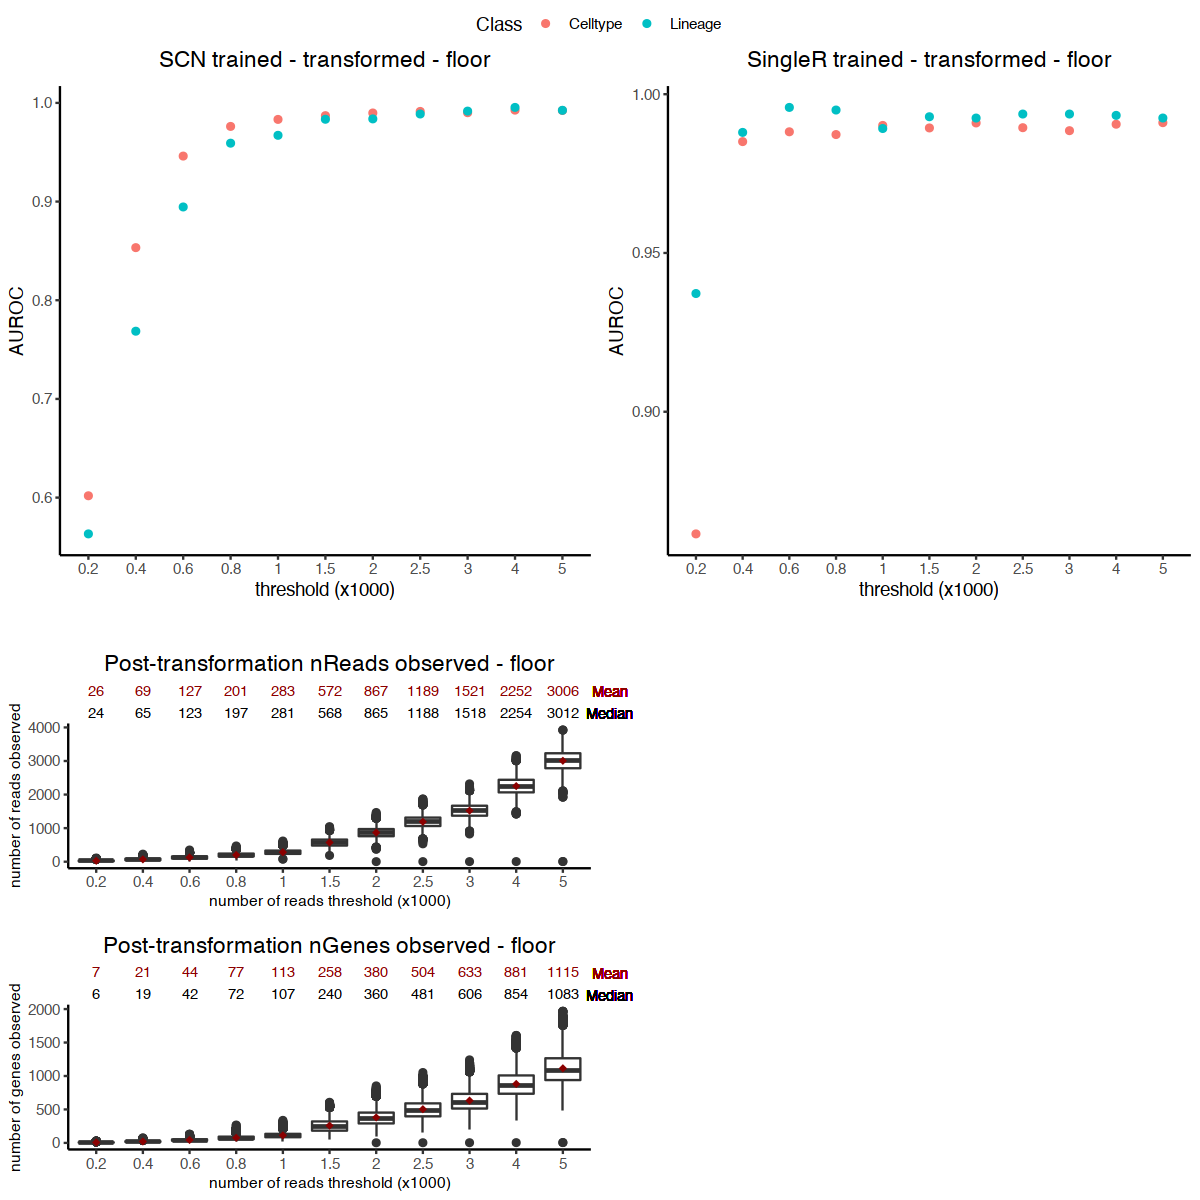

In [189]:

options(repr.plot.width=10, repr.plot.height=10)


# train = 'SCN', 'SR'
# method = 'floor', 'non-binary'
# function plots the AUC at different thresholds of a 'train' algorithm and transformed by 'method'
AUCplot <- function(train, method) {
    if (train == 'SCN'){ 
        train = perf.SCN
        train.name <- 'SCN trained'

    } else if(train == 'SR') {
        train = perf.SR
        train.name <- 'SingleR trained'
        }

    # AUC plot    
    ggplot(train[train$method == method,], aes(as.factor(threshold), as.numeric(AUC_pROC)  )) + 
                geom_point(aes(color = as.factor(class))) + 
                ggtitle(paste(train.name, "transformed", method, sep =' - ')) +
                xlab("threshold (x1000)") + ylab("AUROC")+ labs(color='Class')  +
                theme_classic() + 
                theme(plot.title = element_text(vjust = 2, hjust = 0.5)) # center plot title

}

mean.v = -15
median.v = -13

# show reads and genes distribution, mean and median 
statplot <- function(method){
    if (method == 'floor'){table_type <- 'reads'}
    else ( table_type <- 'genes')
    # reads distribution plot 
    plot1 <- ggplot(dist.reads_floor, aes(as.factor(variable), value)) + 
                geom_boxplot() + 
                stat_summary(fun= mean, colour="darkred", geom="point", shape=18, size=2, show.legend=FALSE) + # mean
                geom_text(data = stat.reads_floor, aes(label = Mean, y =  10), vjust= mean.v, size = 3, colour="darkred") +  # mean annotations
                geom_text(data = stat.reads_floor , aes(label = median, y =  10), vjust= median.v, size = 3, colour="black") +  # median annotations 
                geom_text(x=12, y = mean.v, label="Mean", colour="darkred", size = 3, vjust = mean.v ) +  # mean label
                geom_text(x=12, y = median.v, label="Median", colour="black", size = 3, vjust = median.v) +  # median label

                ggtitle(paste("Post-transformation nReads observed -", method)) +
                xlab(paste('number of', table_type, 'threshold (x1000)'))  + ylab("number of reads observed") + 
                theme_classic() +
                theme(plot.title = element_text(vjust = 9, hjust = 0.5), # title centered & up to accomodate stats annotations
                    axis.title=element_text(size= 9,face="bold")) + # adjust axis label sizes
                coord_cartesian(clip = "off")

    # genes distribution plot 
    plot2 <- ggplot(dist.genes_floor, aes(as.factor(variable), value)) + 
            geom_boxplot() + 
            stat_summary(fun= mean, colour="darkred", geom="point", shape=18, size=2, show.legend=FALSE) + # mean
            geom_text(data = stat.genes_floor, aes(label = Mean, y =  10), vjust= mean.v, size = 3, colour="darkred") +  # mean annotations 
            geom_text(data = stat.genes_floor, aes(label = median, y =  10), vjust= median.v, size = 3, colour="black") +  # median annotations 
            geom_text(x=12, y = mean.v, label="Mean", colour="darkred", size = 3, vjust = mean.v ) +  # mean label
            geom_text(x=12, y = median.v, label="Median", colour="black", size = 3, vjust = median.v) +  # median label
            ggtitle(paste("Post-transformation nGenes observed -", method)) +
            xlab(paste('number of', table_type, 'threshold (x1000)')) + ylab("number of genes observed") + 
            theme_classic() +
            theme(plot.title = element_text(vjust = 9, hjust = 0.5), # title centered & up to accomodate stats annotations
                axis.title=element_text(size= 9,face="bold")) + # adjust axis label sizes
            coord_cartesian(clip = "off")

    spacer <- NULL
    ggarrange(grobs = spacer, plot1, spacer, plot2, ncol = 1, nrow = 4, heights=c(20, 100, 20, 100), widths = c(200), legend ='top') 
}

# summary plots
plot1 <- AUCplot('SCN', 'floor')
plot2 <- AUCplot('SR', 'floor')
plot3 <- statplot('floor')


# plot3 <- plotf('SCN', 'non-binary')
# plot4 <- plotf('SR', 'non-binary')

# pdf('performance_perf.SCNary_400_400cells.pdf')
spacer <- NULL
ggarrange(grobs = plot1, plot2, spacer, spacer, plot3, ncol = 2, nrow = 3, heights=c(400, 20, 400), widths = c(200,  200), common.legend = TRUE)

#dev.off()



In [ ]:
# Figure 3

setwd('/Users/ibishara/Desktop/FELINE_C1/')

# packages
library(data.table)
library(tidyverse)
library(ggridges)
library(ggpubr)
library(qs)
library(factoextra)


# data
meta_raw <- read.table('raw/FELINE_C1_raw_singler_metadata.txt', sep='\t') # combined raw metadata of FELINE-C1. Generated by IB. Not used in this analysis. 

hpca_anno_raw <- as.data.frame(fread('/Users/ibishara/Desktop/FELINE_C1/raw/SingleR/hpca/FELINE_C1_hpca_singleR_annotations.txt', sep='auto'))[, -1] # hpca singleR annotations FELINE-C1
metadata_post_filter <- as.data.frame(fread('/Users/ibishara/Desktop/FELINE_C1/post-filter/FEL001046_scRNA.metadata_JF.txt', sep='auto')) # Jinfeng's high quality metadata 
meta_sub <- read.table('metadata_subsample_cell_quality.txt', sep='\t') # subsample metadata


# # data
seu <- qread(file = "seu.qs", nthreads = 16)
meta_sub <- seu@meta.data

## indexing 
# Lineage
epi.ind <- which(meta_sub$Lineage == "Epithelial_cells")
mes.ind <- which(meta_sub$Lineage == "Mesenchymal_cells")
hem.ind <- which(meta_sub$Lineage == "Hematopoeitic_cells")

# cell type
tcell.ind <- which( meta_sub$hpca == "T_cells" )
bcell.ind <- which( meta_sub$hpca == "B_cell" )
macro.ind <- which( meta_sub$hpca == "Macrophage")
fibro.ind <- which( meta_sub$hpca == "Fibroblasts")
endo.ind <- which( meta_sub$hpca == "Endothelial_cells")
bcell.ind <- which( meta_sub$hpca == "B_cell")



## setting cut-offs
## JF's cut-off for FELINE_C1: > 2000 UMI. 500 - 7000 genes 
nCount_RNA_cutoff <- 1500
new.nCount_RNA_cutoff <- 800
Expressed.Features_cutoff.min <- 500
Expressed.Features_cutoff.max <- 7000



all.retained <- length(which(meta_sub$nCount_RNA < nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA )
epi.retained <- length(which(meta_sub$nCount_RNA[epi.ind] < nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA[epi.ind] )
mes.retained <- length(which(meta_sub$nCount_RNA[mes.ind] < nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA[mes.ind] )
hem.retained <- length(which(meta_sub$nCount_RNA[hem.ind] < nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA[hem.ind] )

tcell.retained <- length(which(meta_sub$nCount_RNA[tcell.ind] < nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA[tcell.ind] )
macro.retained <- length(which(meta_sub$nCount_RNA[macro.ind] < nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA[macro.ind] )
fibro.retained <- length(which(meta_sub$nCount_RNA[fibro.ind] < nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA[fibro.ind] )
endo.retained <- length(which(meta_sub$nCount_RNA[endo.ind] < nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA[endo.ind] )
bcell.retained <- length(which(meta_sub$nCount_RNA[bcell.ind] < nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA[bcell.ind] )


Warning message in fread("/Users/ibishara/Desktop/FELINE_C1/raw/SingleR/hpca/FELINE_C1_hpca_singleR_annotations.txt", :
"Detected 2 column names but the data has 3 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file."


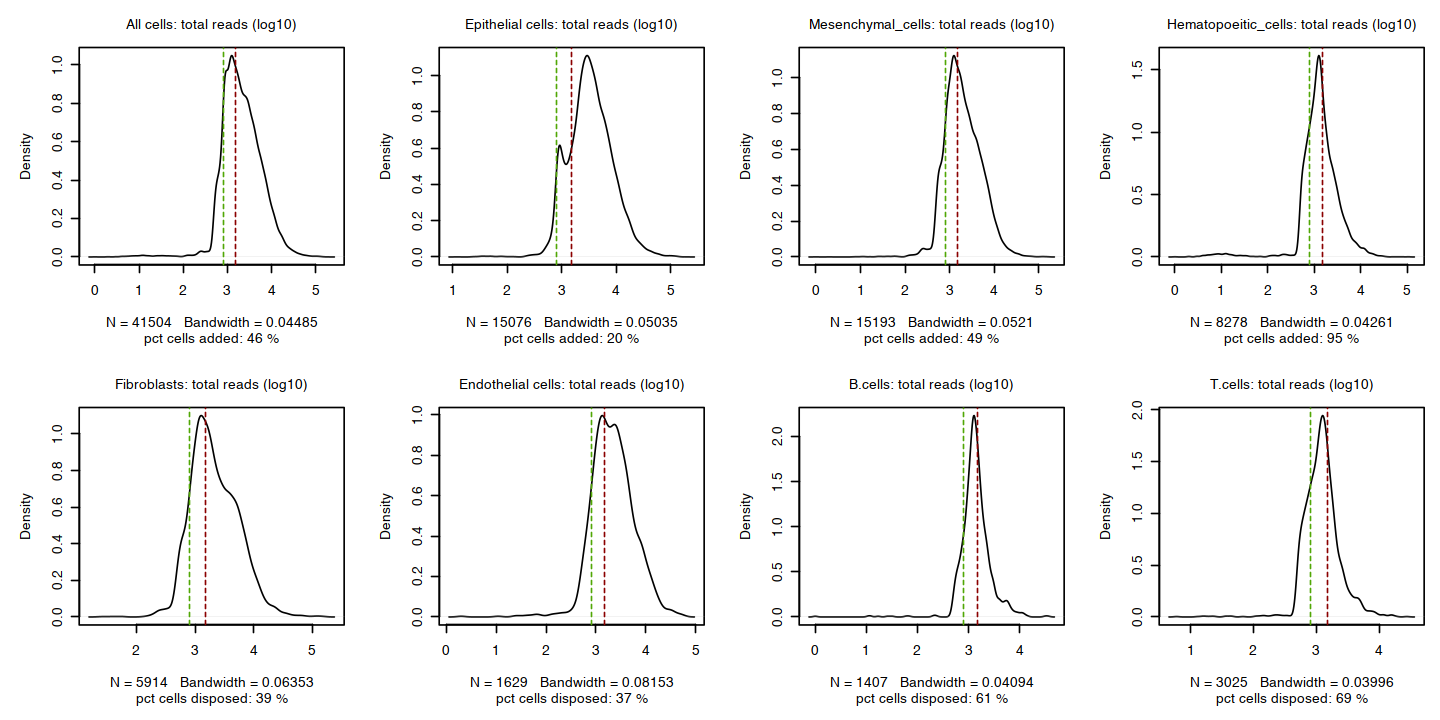

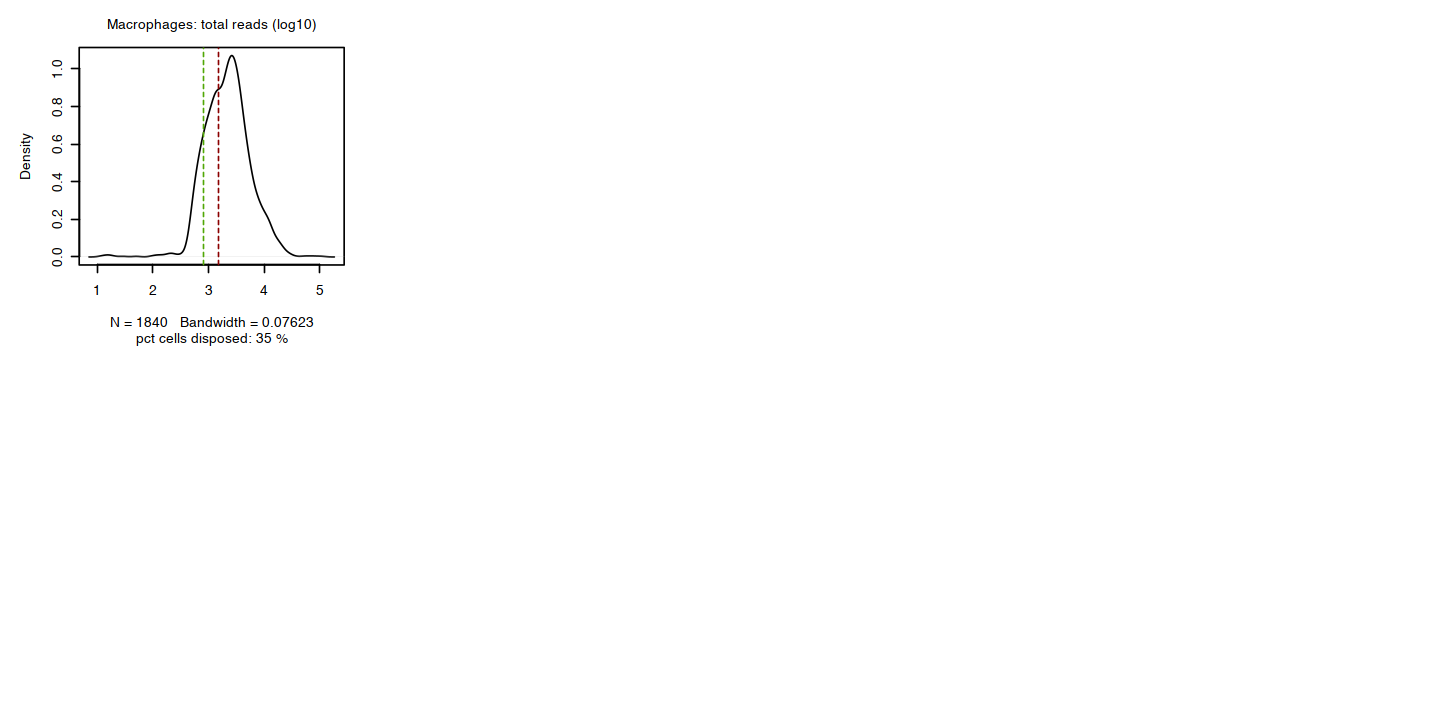

In [ ]:

options(repr.plot.width=12, repr.plot.height=6)

pre.retained.all <- length(which(meta_sub$nCount_RNA > nCount_RNA_cutoff))
post.retained.all <- length(which(meta_sub$nCount_RNA < nCount_RNA_cutoff & meta_sub$nCount_RNA > new.nCount_RNA_cutoff))

pre.retained.epi <- length(which(meta_sub$nCount_RNA[epi.ind] > nCount_RNA_cutoff))
post.retained.epi <- length(which(meta_sub$nCount_RNA[epi.ind] < nCount_RNA_cutoff & meta_sub$nCount_RNA[epi.ind] > new.nCount_RNA_cutoff))

pre.retained.mes <- length(which(meta_sub$nCount_RNA[mes.ind] > nCount_RNA_cutoff))
post.retained.mes <- length(which(meta_sub$nCount_RNA[mes.ind] < nCount_RNA_cutoff & meta_sub$nCount_RNA[mes.ind] > new.nCount_RNA_cutoff))

pre.retained.hem <- length(which(meta_sub$nCount_RNA[hem.ind] > nCount_RNA_cutoff))
post.retained.hem <- length(which(meta_sub$nCount_RNA[hem.ind] < nCount_RNA_cutoff & meta_sub$nCount_RNA[hem.ind] > new.nCount_RNA_cutoff))

## Plot number of reads and genes by lineage
par(mfrow=c(2,4), mar=c(6,5,3,1))
plot(main = "All cells: total reads (log10)", sub = paste('pct cells added:', round(100*post.retained.all/pre.retained.all),'%' ), density(log10(meta_sub$nCount_RNA)), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")
plot(main = "Epithelial cells: total reads (log10)", sub = paste('pct cells added:', round(100*post.retained.epi/pre.retained.epi),'%' ), density(log10(meta_sub$nCount_RNA[epi.ind])), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")
plot(main = "Mesenchymal_cells: total reads (log10)", sub = paste('pct cells added:', round(100*post.retained.mes/pre.retained.mes),'%' ), density(log10(meta_sub$nCount_RNA[mes.ind])), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")
plot(main = "Hematopoeitic_cells: total reads (log10)", sub = paste('pct cells added:', round(100*post.retained.hem/pre.retained.hem),'%' ), density(log10(meta_sub$nCount_RNA[hem.ind])), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")

plot(main = "Fibroblasts: total reads (log10)", sub = paste('pct cells retained:', round(100*fibro.retained ),'%' ), density(log10(meta_sub$nCount_RNA[fibro.ind])), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")
plot(main = "Endothelial cells: total reads (log10)", sub = paste('pct cells retained:', round(100*endo.retained ),'%' ), density(log10(meta_sub$nCount_RNA[endo.ind])), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")
plot(main = "B.cells: total reads (log10)", sub = paste('pct cells retained:', round(100*bcell.retained ),'%' ), density(log10(meta_sub$nCount_RNA[bcell.ind])), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")
plot(main = "T.cells: total reads (log10)", sub = paste('pct cells retained:', round(100*tcell.retained ),'%' ), density(log10(meta_sub$nCount_RNA[tcell.ind])), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")
plot(main = "Macrophages: total reads (log10)", sub = paste('pct cells retained:', round(100*macro.retained ),'%' ), density(log10(meta_sub$nCount_RNA[macro.ind])), cex.main = 1); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")

# dev.off()


